# Práctica guiada

## Predicción de enfermedad cardíaca con Random Forest

<img src="img/heart-health-tips-animation-thumbnail.gif" alt="hearth">


El hospital de León quiere **predecir riesgo de enfermedad cardíaca** a partir de datos clínicos básicos de pacientes.


El objetivo **no es solo entrenar un modelo**, sino **decidir qué modelo es más adecuado**, cómo configurarlo y **explicar por qué**.

Trabajarás con:

* `heart.csv` → dataset completo
* `heart_disease_4features.csv` → versión reducida y más interpretable

El cuaderno base utiliza **Random Forest**, búsqueda de hiperparámetros y visualización de árboles .

---

## Resultados de aprendizaje trabajados

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados

---

## Entrega

Un **notebook Jupyter** en formato PDF con:

* Código funcional
* Respuestas razonadas en Markdown
* Gráficas y métricas
* Conclusiones claras

---

## ¿Qué es Random Forest?

**Random Forest** es un algoritmo de **aprendizaje automático supervisado** que se utiliza tanto para **clasificación** como para **regresión**.

La idea principal es sencilla:

> En lugar de tomar una decisión con un solo árbol de decisión, Random Forest entrena **muchos árboles distintos** y combina sus resultados para obtener una predicción más fiable.

---

## ¿Cómo funciona?

1. Se crean **muchos subconjuntos distintos** del conjunto de entrenamiento (muestreo con reemplazo).
2. Con cada subconjunto se entrena **un árbol de decisión diferente**.
3. En cada árbol, las divisiones se hacen usando **solo una parte aleatoria de las variables**.
4. Para clasificar un nuevo dato:

   * Cada árbol da su predicción.
   * El modelo final decide por **votación mayoritaria**.

Este proceso reduce los errores debidos a:

* árboles demasiado complejos
* datos ruidosos
* sobreajuste al conjunto de entrenamiento

<img src="img/random-forest.png" alt="random forest">

---

## ¿Por qué no usar un solo árbol de decisión?

Un árbol de decisión:

* es fácil de entender
* pero **muy sensible a los datos**
* puede memorizar el entrenamiento (overfitting)

Random Forest soluciona esto porque:

* combina muchos árboles simples
* promedia sus decisiones
* generaliza mejor a datos nuevos

---

## Ventajas de Random Forest

* Funciona bien con **datos tabulares**
* No necesita normalización de variables
* Captura relaciones **no lineales**
* Es robusto frente al ruido
* Permite estimar la **importancia de las variables**

Por eso es muy utilizado en:

* medicina
* banca
* detección de fraude
* problemas reales con datos estructurados

---

## Inconvenientes

* Es menos interpretable que un solo árbol
* Consume más tiempo y recursos
* No es ideal cuando se necesita un modelo muy simple o explicable al 100%

Más información

[Machine Learning Google](https://developers.google.com/machine-learning/decision-forests?hl=es-419)

[Videotutorial: Random Forests con Python](https://www.youtube.com/watch?v=VfMPslt2wgA)

---

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)

## Parte 1 – Exploración y comprensión del dataset (obligatoria)

### 1.1 Carga de datos

Carga ambos datasets y responde:

In [30]:
df1 = pd.read_csv("./data/heart_disease_4features.csv")
df2 = pd.read_csv("./data/heart.csv")  

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1025 non-null   int64
 1   age         1025 non-null   int64
 2   sex         1025 non-null   int64
 3   trestbps    1025 non-null   int64
 4   chol        1025 non-null   int64
 5   target      1025 non-null   int64
dtypes: int64(6)
memory usage: 48.2 KB


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<div style="background-color:green;color:white">

<br>

**Cuestiones (responde en Markdown):**

* ¿Cuántas variables tiene cada dataset?
    - El primero tiene 6 y el segundo 14

* ¿Cuál crees que será más fácil de explicar a un médico?
    - El primero que tiene menos variables

* ¿Qué se pierde al reducir variables?
    - Datos


<br>

---

### 1.2 Variable objetivo

<div style="background-color:green;color:white">

<br>

* Identifica claramente la variable *objetivo*

* Explica qué significa *0* y *1*
    - 0 -> El paciente NO tiene enfermedad cardíaca
    - 1 -> El paciente SÍ tiene enfermedad cardíaca

* Comprueba si hay **desbalanceo de clases**
    - No hay desbalanceo

 <br>

In [33]:
df1["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Parte 2 – Primer modelo Random Forest (baseline)

### 2.1 Separación train/test

Usa `train_test_split` con:

* `test_size=0.2`
* `random_state=42`



In [34]:
X = df1.drop('target', axis=1) 
y = df1['target']  

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">

<br>

Explica **por qué fijar la semilla es importante**.
- Para que cuando se ejecute el código la repartición sea de la misma manera Train y Test

<br>

---

### 2.2 Entrenamiento inicial

Entrena un **Random Forest controlado**, es decir, **no utilices el modelo con los valores por defecto**.

Para ello:

* Crea un `RandomForestClassifier` fijando **explícitamente varios hiperparámetros**.
* Debes **limitar la complejidad del modelo** para evitar sobreajuste.
* Asegura que el entrenamiento sea **reproducible**.
* Evita que el modelo tome decisiones basadas en **muy pocos ejemplos**.
* (Opcional) Activa una estimación interna del rendimiento.

El modelo debe entrenarse con los datos de entrenamiento (`X_train`, `y_train`).

📌 **Ayuda**
Consulta la documentación oficial de [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en *scikit-learn* para identificar qué hiperparámetros permiten:

* controlar la profundidad de los árboles,
* fijar el número de árboles,
* imponer un tamaño mínimo en las hojas,
* y garantizar reproducibilidad.




In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=200,        # número de árboles
    max_depth=6,             # limita la profundidad (evita sobreajuste)
    min_samples_split=10,    # mínimo de muestras para dividir un nodo
    min_samples_leaf=5,      # mínimo de muestras en una hoja
    random_state=42,         # garantiza reproducibilidad
    oob_score=True           # estimación interna del rendimiento 
)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, oob_score=True, random_state=42)

---
## Parte 3 – Evaluación correcta del modelo

Una vez entrenado el modelo, es necesario **evaluar su rendimiento** para comprobar si es capaz de **generalizar correctamente** a datos que no ha visto durante el entrenamiento.

En esta parte no basta con obtener una predicción: se deben analizar **distintas métricas**, ya que cada una aporta información diferente sobre el comportamiento del modelo.

---

### Qué se va a hacer

Se evaluará el modelo utilizando el conjunto de test y se mostrarán:

* **Accuracy**
* **Matriz de confusión**
* **Informe de clasificación (classification report)**

Estas métricas permiten analizar no solo cuántas predicciones acierta el modelo, sino **qué tipo de errores comete**.

---

### Por qué no es suficiente una sola métrica

En problemas de clasificación, especialmente en contextos reales como la medicina, **no todos los errores tienen el mismo impacto**.
Por ejemplo, clasificar como sano a un paciente enfermo puede ser mucho más grave que el error contrario.

Por ello, es imprescindible analizar varias métricas y no quedarse solo con la accuracy.

---

- Accuracy: Indica el **porcentaje total de predicciones correctas**.


- Matriz de confusión: Muestra el **número de aciertos y errores por clase**, permite ver **qué tipo de errores son más frecuentes**.

- Classification report: Resume varias métricas clave para cada clase:

* **Precision**: de las predicciones positivas, cuántas son correctas.
* **Recall (sensibilidad)**: de los casos reales, cuántos detecta el modelo.
* **F1-score**: equilibrio entre precision y recall.

---




In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones
y_pred = rfc.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7609756097560976

Matriz de confusión:
[[71 31]
 [18 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       102
           1       0.73      0.83      0.78       103

    accuracy                           0.76       205
   macro avg       0.77      0.76      0.76       205
weighted avg       0.77      0.76      0.76       205



<div style="background-color:green;color:white">

<br>

- ¿El rendimiento del modelo es adecuado?
    - Es aceptable, pero mejorable, especialmente para un contexto médico.

- ¿Qué clase se predice mejor y cuál peor?
    - La clase 1 se predice mejor (recall 0.83).
    - La clase 0 se predice peor (recall 0.70).

- ¿Qué tipo de error consideras más problemático en este contexto y por qué?
    - El falso negativo (decir que no hay enfermedad cuando sí la hay), porque puede impedir diagnóstico y tratamiento.

- ¿Es suficiente la accuracy en un problema médico?
    - No, es más importante el recall, sobre todo para detectar pacientes enfermos.

- Justifica con un ejemplo concreto.
    - Si un paciente con enfermedad cardíaca es clasificado como sano, no recibe atención médica, lo que puede tener consecuencias graves.

<br>

---

## Parte 4 – Optimización con GridSearchCV

En esta parte se va a **optimizar el modelo Random Forest entrenado anteriormente** utilizando **validación cruzada**.

En lugar de fijar los hiperparámetros manualmente, se utilizará `GridSearchCV` para **probar distintas combinaciones** de valores y seleccionar automáticamente la que **mejor rendimiento medio** obtenga en validación cruzada.

Se repetirá la **misma estrategia utilizada en el cuaderno base**:

* Se variará la **profundidad máxima de los árboles**.
* Se limitará el **número mínimo de muestras por hoja** para evitar decisiones basadas en pocos datos.
* Se probarán distintos **números de árboles** en el bosque.
* El rendimiento se evaluará mediante **accuracy** y validación cruzada.

El objetivo **no es solo mejorar la métrica**, sino **comparar el modelo optimizado con el modelo controlado anterior** y reflexionar sobre el coste computacional.

---


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}


rfc = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 50}
Mejor accuracy: 0.8


A partir del modelo y del conjunto de hiperparámetros definidos anteriormente, configura un proceso de **búsqueda exhaustiva** de hiperparámetros utilizando `GridSearchCV`.

El proceso debe cumplir las siguientes condiciones:

* Utiliza como **estimador** el modelo `RandomForestClassifier` previamente definido.
* Emplea el conjunto de hiperparámetros almacenado en `param_grid`.
* Aplica **validación cruzada** con un número fijo de particiones.
* Evalúa el rendimiento usando una **métrica de clasificación adecuada**.
* Aprovecha todos los núcleos disponibles del sistema.
* Muestra información detallada del proceso de búsqueda.

Al finalizar:

* Identifica los **mejores hiperparámetros** encontrados.
* Recupera el **mejor modelo** entrenado.
* Evalúa dicho modelo sobre el conjunto de test.

📌 **Ayuda**
Consulta la documentación oficial de [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que permiten


* indicar el estimador,
* definir la rejilla de parámetros,
* establecer el número de particiones de la validación cruzada,
* seleccionar la métrica de evaluación,
* activar el uso de múltiples núcleos,
* y mostrar el progreso del entrenamiento.




In [39]:
# Mejor modelo entrenado
best_model = grid.best_estimator_

# Evaluar el modelo en el conjunto de test
y_pred = best_model.predict(X_test)

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy en test: 0.8
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       102
           1       0.79      0.83      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



<div style="background-color:green;color:white">

<br>

- ¿Qué combinación obtiene mejor resultado?
    - max_depth = 20, min_samples_leaf = 5, n_estimators = 50

- ¿Ha mejorado realmente frente al modelo inicial?
    - Sí, la accuracy pasa de ~0.76 a 0.80 y mejoran precision, recall y f1-score.

- ¿Cuánto tiempo tarda y por qué?
    - Tarda más porque entrena múltiples modelos (todas las combinaciones del param_grid) usando validación cruzada, lo que multiplica el número de entrenamientos.

<br>

---

## Parte 5 – Interpretabilidad: dentro del bosque 

### 5.1 Visualización de un árbol

En esta parte se va a **analizar el interior del modelo Random Forest** para comprender **cómo toma decisiones**.

Un Random Forest está formado por **muchos árboles de decisión**. El modelo final no se basa en uno solo, sino en la **combinación de todos ellos**.
Sin embargo, para entender el funcionamiento interno del modelo, es útil **visualizar uno de esos árboles individuales**.

El objetivo **no es explicar el modelo completo**, sino:

* observar **qué variables utiliza**,
* entender **qué tipo de reglas aprende**,
* y reflexionar sobre **las limitaciones de la interpretabilidad** en modelos de conjunto.


---

### Pistas para la implementación

* Un `RandomForestClassifier` almacena los árboles entrenados en un **atributo interno**.
* Cada árbol puede visualizarse usando una función específica de `sklearn.tree`.
* Es recomendable:

  * fijar el tamaño de la figura,
  * limitar la profundidad del árbol representado,
  * mostrar los nombres de las variables,
  * y colorear los nodos para facilitar la interpretación.

📌 **Ayuda**
Consulta la documentación de:

* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para localizar dónde se almacenan los árboles entrenados.
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para identificar los parámetros que controlan la visualización, los nombres de las variables y la profundidad máxima.



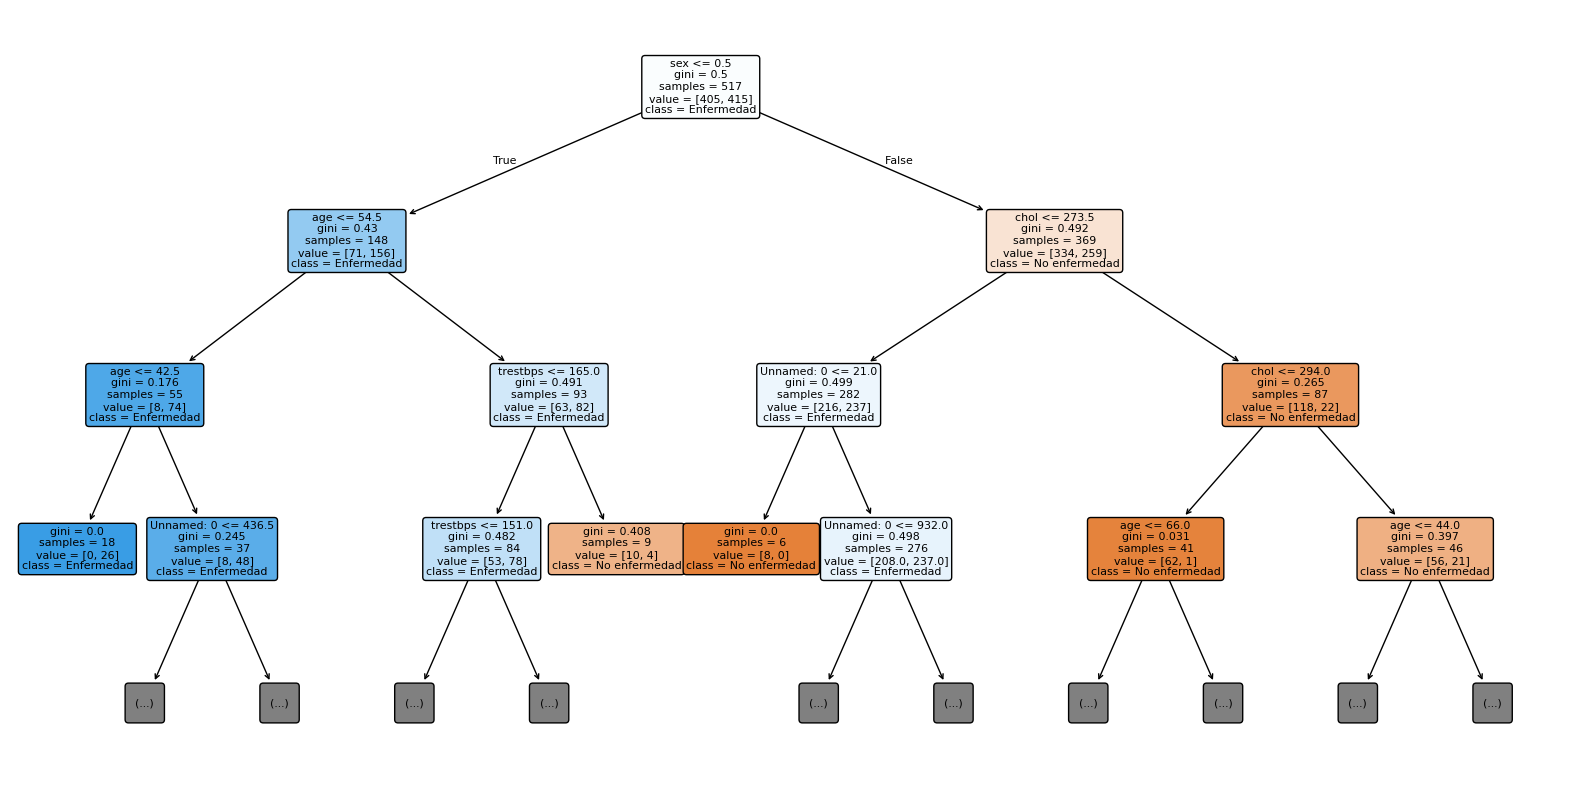

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree = best_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X_train.columns,  
    class_names=["No enfermedad", "Enfermedad"],
    filled=True,                     
    max_depth=3,                   
    rounded=True
)
plt.show()


<div style="background-color:green;color:white">

<br>

**Explica:**

* Qué variable aparece primero
    - La variable sex aparece en la raíz del árbol, lo que indica que es la que más reduce la impureza en este árbol concreto.

* Qué significa una condición tipo *chol <= 240*
    - Significa que el árbol divide a los pacientes según su nivel de colesterol: si el colesterol es ≤ 240 va por una rama, si es mayor por otra, aprendiendo reglas distintas para cada grupo.

* Por qué **no debemos mostrar este árbol a un médico como modelo final**
    - Porque es solo uno de muchos árboles del Random Forest y no representa la decisión final, que es la combinación de todos.

<br>

---

### 5.2 Importancia de variables

En este apartado se va a analizar **qué variables son más importantes para el modelo Random Forest** a la hora de realizar sus predicciones.

Un Random Forest toma decisiones combinando muchos árboles de decisión. En cada árbol, las variables no se usan todas por igual: algunas aparecen con más frecuencia y generan **mejores divisiones** que reducen más la incertidumbre del modelo.
A partir de esta información, el modelo puede estimar la **importancia relativa de cada variable**.

---


#### Pistas para la implementación

* Los modelos `RandomForestClassifier` calculan automáticamente la importancia de las variables tras el entrenamiento.
* Esta información se encuentra en un **atributo del modelo**.
* Para interpretarla correctamente:

  * es conveniente asociar cada valor con el nombre de su variable,
  * y ordenar los resultados para facilitar el análisis.

📌 **Ayuda**
Consulta la documentación de `RandomForestClassifier` para identificar el atributo que almacena la importancia de las variables y su significado.


In [41]:
import pandas as pd

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

feature_importance_df

,Variable,Importancia
4,chol,0.291814
1,age,0.282218
3,trestbps,0.182315
2,sex,0.124208
0,Unnamed: 0,0.119445


<div style="background-color:green;color:white">

<br>

- ¿Coincide con lo que esperarías médicamente?
    - Sí: Es normal que variables como edad, sexo, colesterol o la presión arterial sean importantes, son factores conocidos que afectan en las enfermedades del corazón.

- ¿Qué variable eliminarías si quisieras simplificar aún más?
    - Quitaría la de Unnamed, ya que es la menos importante, casi no inlfute en la decisión del modelo y eliminarla no cambiaría apenas el resultado.

<br>

---

## Parte 6 – Comparación crítica de datasets

Entrena **el mismo modelo** con:

* dataset completo
* dataset de 4 variables


---

In [53]:
X_completo = df2.drop("target", axis=1)
y_completo = df2["target"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_completo, y_completo, test_size=0.2, random_state=42, stratify=y_completo)

modelo_completo = RandomForestClassifier(
    max_depth= 20,
    min_samples_leaf= 5,
    n_estimators= 50,
    random_state= 42)

modelo_completo.fit(Xc_train, yc_train)
acc_completo = modelo_completo.score(Xc_test, yc_test)

print("Accuracy dataset completo:", acc_completo)

y_pred_completo = modelo_completo.predict(Xc_test)
print("Modelo completo:")
print(classification_report(yc_test, y_pred_completo))

Accuracy dataset completo: 0.9463414634146341
Modelo completo:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.93      0.97      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [54]:
X_4 = df1.drop("target", axis=1)
y_4 = df1["target"]

X4_train, X4_test, y4_train, y4_test = train_test_split(
    X_4, y_4, test_size=0.2, random_state=42, stratify=y_completo)

modelo_4 = RandomForestClassifier(
    max_depth= 20,
    min_samples_leaf= 5,
    n_estimators= 50,
    random_state= 42)

modelo_4.fit(X4_train, y4_train)
acc_4 = modelo_4.score(X4_test, y4_test)

print("Accuracy dataset completo:", acc_4)

y_pred_4 = modelo_4.predict(X4_test)
print("Modelo 4 variables:")
print(classification_report(y4_test, y_pred_4))

Accuracy dataset completo: 0.8097560975609757
Modelo 4 variables:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.85      0.82       105

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



<div style="background-color:green;color:white">

<br>

Completa una tabla como esta:

| Dataset             | Accuracy | Interpretabilidad | Riesgo de overfitting |
|---------------------|----------|-------------------|----------------------|
| Dataset completo    | 0.95     | Baja              | Alto                 |
| Dataset 4 variables | 0.81     | Alta              | Bajo                 |

<br>



<div style="background-color:green;color:white">

<br>

¿Qué modelo recomendarías *en un hospital pequeño* y por qué?
- El de las 4 varibles, porque es más simple, fácil de interpretar y requiere menos datos.


<br>

---

## Parte 7 – Reflexión final

Responde brevemente (5–6 líneas cada una):

<div style="background-color:green;color:white">

<br>

1. ¿Por qué Random Forest es una buena elección aquí?
    - Random Forest combina muchos árboles de decisión, lo que reduce errores y mejora la estabilidad del modelo.
    - Funciona bien con datos tabulares y relaciones no lineales.
    - Es robusto frente al ruido y al overfitting.
    - Además, ofrece métricas como la importancia de variables.
    - Esto lo hace útil en problemas médicos como apoyo a la decisión.

2. ¿Cuándo **no** usarías Random Forest?
    - No lo usaría si se necesita un modelo muy simple y totalmente explicable.
    - Tampoco si el conjunto de datos es muy pequeño.
    - Puede ser costoso computacionalmente con muchos árboles.
    - En tiempo real o dispositivos con pocos recursos no es ideal.
    - En esos casos, modelos más simples pueden ser mejores.

3. ¿Qué mejorarías si tuvieras más datos?
    - Ajustaría mejor los hiperparámetros del modelo.
    - Probaría modelos más complejos sin tanto riesgo de overfitting.
    - Mejoraría la generalización del modelo.
    - Analizaría nuevas variables relevantes.
    - También validaría el modelo en distintos grupos de pacientes.

<br>
